# Project - Olist Brazilian E-commerce dataset

Context
This dataset was provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on their website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, the customer gets a satisfaction survey by email where he can give a **note for the purchase experience.**
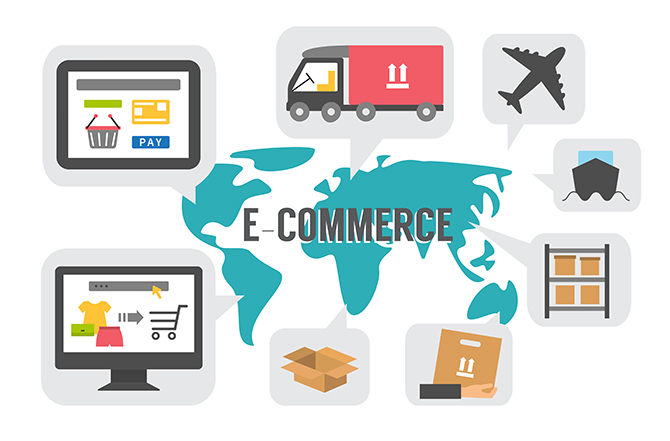


**1. Business Area Requirements:**

1.1 Customer Profiling: Understanding the customer profile.

1.2 Assessment of Ratings: Understanding our current performance in evaluations.

1.3 Area Objective: To receive predominantly 5 and 4 ratings.

**2. Purpose of the data science project:**

2.1 Developing a model to predict customer ratings.

2.2 Implementing proactive measures to address potential low ratings

# 1. Import Libraries

In [1]:
## Connecting to Google drive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.offline as py

# Ignorar warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 2. Merge Big Table
**The present dataset has different data sources, each table specifying a topic of e-commerce sales. The tables are separated into:** 
1. Costumers
2. Geolocation
3. Orders
4. Order items
5. Payments
6. Order reviews
7. Products 
8. Sellers
9. Product category name

**Using SQL language I created a Big table with the union between all the tables and performed a new exploratory analysis with confrontations between the most diverse features of the dataset,** so that we can perform a full exploratory analysis of the dataset, with the following code below: 

```
SELECT * 
FROM customer c LEFT JOIN orders o ON (o.customer_id = c.customer_id)
LEFT JOIN order_payments op ON (op.order_id = o.order_id)
LEFT JOIN order_reviews or2 ON (or2.order_id = o.order_id)
LEFT JOIN order_items oi ON (oi.order_id = o.order_id)
LEFT JOIN products p ON (p.product_id  = oi.product_id)
LEFT JOIN sellers s ON (s.seller_id = oi.seller_id)
```
The JOINS mentioned above were based on the Data Schema provided by Olist to understand the relationships and foreign keys between the tables.

Then we export the table as a CSV file called **'Olist_bigdata.csv'.**

# 3. Read Data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Olist_project/Olist_bigdata.csv', sep=',')
df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,customer_id.1,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_id.1,payment_sequential,payment_type,payment_installments,payment_value,review_id,order_id.2,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_id.3,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_id.1,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id.1,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,00e7ee1b050b8499577073aeb2a297a1,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,00e7ee1b050b8499577073aeb2a297a1,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,7c67e1448b00f6e969d365cea6b010ab,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,29150127e6685892b6eab3eec79f59c7,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,29150127e6685892b6eab3eec79f59c7,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,b8bc237ba3788b23da09c0f1f3a3288c,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,b2059ed67ce144a36e2aa97d2c9e9ad2,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,7c67e1448b00f6e969d365cea6b010ab,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,951670f92359f4fe4a63112aa7306eba,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,951670f92359f4fe4a63112aa7306eba,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,a5647c44af977b148e0a3a4751a09e2e,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,7c67e1448b00f6e969d365cea6b010ab,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,credit_card,8.0,252.25,84908

## 3.1 Data Description

In [6]:
#Data dimension

print("Number of rows: {}".format(df.shape[0]));
print("Number of columns: {}".format(df.shape[1]))
df.info()

Number of rows: 119151
Number of columns: 45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119151 entries, 0 to 119150
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119151 non-null  object 
 1   customer_unique_id             119151 non-null  object 
 2   customer_zip_code_prefix       119151 non-null  int64  
 3   customer_city                  119151 non-null  object 
 4   customer_state                 119151 non-null  object 
 5   order_id                       119151 non-null  object 
 6   customer_id.1                  119151 non-null  object 
 7   order_status                   119151 non-null  object 
 8   order_purchase_timestamp       119151 non-null  object 
 9   order_approved_at              118974 non-null  object 
 10  order_delivered_carrier_date   117065 non-null  object 
 11  order_delivered_customer_date  115730 non-null

In [7]:
#Checking for null datas
df.isnull().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
customer_id.1                         0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_id.1                            3
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                             0
order_id.2                            0
review_score                          0
review_comment_title             104962
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0


In [8]:
#Analysis of statistical distributions
describe = df[['payment_value', 'review_score', 'price', 'freight_value', 'product_photos_qty']]
describe.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_value,119148.0,172.735670,267.770023,0.00,60.85,108.16,189.24,13664.08
review_score,119151.0,3.998514,1.412529,1.00,3.00,5.00,5.00,5.00
price,118318.0,120.649109,184.107686,0.85,39.90,74.90,134.90,6735.00
freight_value,118318.0,20.032587,15.836559,0.00,13.08,16.28,21.18,409.68
product_photos_qty,116609.0,2.205113,1.717418,1.00,1.00,1.00,3.00,20.00


# 4. Data Cleaning and Preprocessing

**After the merge, some indices in each column are duplicated, which represent the keys between the different tables. As a result, we will exclude them from the analysis table.**

In [9]:
# Drop repeated Columns: 
df.drop(['customer_id.1', 'order_id.1','order_id.2', 'order_id.3', 'product_id.1','seller_id.1', 'order_item_id'], axis = 1, inplace = True)

In [10]:
# Check if we have duplicate rows, since the business area informed us that sometimes the system imputes the same request more than once.

num_duplicated_rows = df.duplicated().sum()
df.drop_duplicates(inplace=True)

print("Number of duplicated rows:", num_duplicated_rows)

Number of duplicated rows: 10641


In [11]:
df.reset_index(drop=True)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108505,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12 16:08:45,74.90,13.88,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.

## 4.1 Data Transformation

In [12]:
# Transform to datetime:
df['order_purchase_timestamp'] = pd.to_datetime (df['order_purchase_timestamp'], format='%Y-%m-%d')
df['order_approved_at'] = pd.to_datetime (df['order_approved_at'], format='%Y-%m-%d')
df['order_delivered_carrier_date'] = pd.to_datetime (df['order_delivered_carrier_date'], format='%Y-%m-%d')
df['order_delivered_customer_date'] = pd.to_datetime (df['order_delivered_customer_date'], format='%Y-%m-%d')
df['order_estimated_delivery_date'] = pd.to_datetime (df['order_estimated_delivery_date'], format='%Y-%m-%d')
df['review_creation_date'] = pd.to_datetime (df['review_creation_date'], format='%Y-%m-%d')
df['review_answer_timestamp'] = pd.to_datetime (df['review_answer_timestamp'], format='%Y-%m-%d')
df['shipping_limit_date'] = pd.to_datetime (df['shipping_limit_date'], format='%Y-%m-%d')

# 5.Exploratory Data Analysis

**Analyzing the Top 10 Customers by payment value**: Which customer has the highest accumulated purchase value?

In [13]:
df_top_customers = df.groupby('customer_unique_id').payment_value.sum().reset_index().sort_values(by='payment_value', ascending = False).head(10)
df_top_customers

,customer_unique_id,payment_value
10376,1b76903617af13189607a36b0469f6f3,15978.65
3826,0a0a92112bd4c708ca5fde585afaa872,13664.08
81722,d97b3cfb22b0d6b25ac9ed4e9c2d481b,10437.58
26456,46450c74a0d8c5ca9395da1daac6c120,9553.02
75528,c8ed31310fc440a3f8031b177f9842c3,9258.24
60913,a229eba70ec1c2abef51f04987deb7a5,8891.00
19539,33de26d1fafbfd4945eb586f7136efe6,8697.99
2418,066ee6b9c6fc284260ff9a1274a82ca7,8530.14
81962,da122df9eeddfedc1dc1f5349a1a690c,7571.63
44447,763c8b1c9c68a0229c42c9fc6f662b93,7274.88


In [14]:
#Plotly - 10 top customers in payment value
plotly_1 = go.Bar(x = df_top_customers['customer_unique_id'],
                  y = df_top_customers['payment_value'],
                  name = 'Top 10 Customers by payment value',
                  marker = {'color': '#1f77b4'})

layout = go.Layout (title = 'Top 10 Customers by payment value',
                    xaxis = {'title': 'Customer unique ID'},
                    yaxis = {'title': 'Payment value'})


df_plotly_1 = [plotly_1]
fig = go.Figure (data = df_plotly_1, layout = layout)
py.iplot(fig)

**Customer States with highest sales**: In which Brazilian state has the highest accumulated payment value in the dataset?

In [15]:
#Sales by state

sales_per_state = df.groupby('customer_state').payment_value.sum().reset_index().sort_values(by='payment_value', ascending = False)
sales_per_state.head()

,customer_state,payment_value
25,SP,6434668.51
18,RJ,2283135.35
10,MG,1991391.94
22,RS,949413.59
17,PR,862487.01


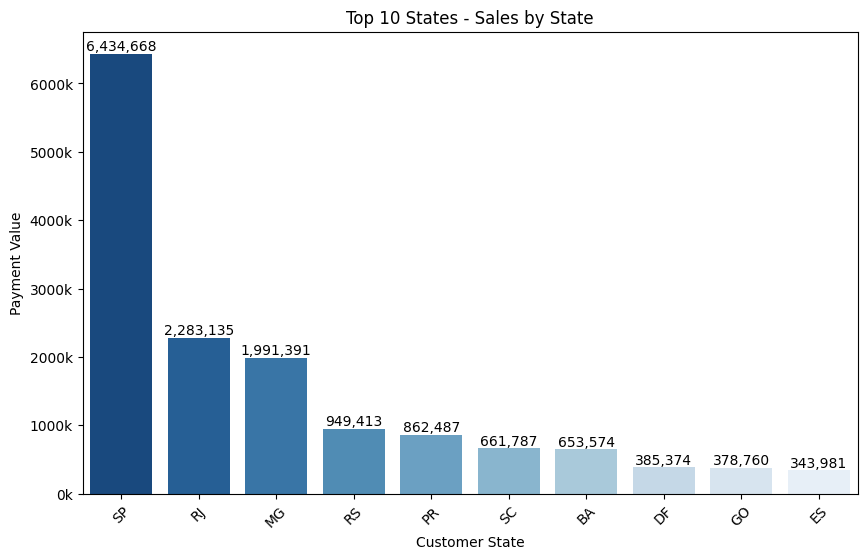

In [16]:
top_10_states = sales_per_state.head(10)

# Definindo a paleta de cores em tons de azul
colors = sns.color_palette('Blues_r', n_colors=10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_10_states, x='customer_state', y='payment_value', palette=colors)
plt.xlabel('Customer State')
plt.ylabel('Payment Value')
plt.title('Top 10 States - Sales by State')
plt.xticks(rotation=45)

# Formatando os rótulos no eixo Y
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

# Adicionando rótulos de dados acima das barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


In [17]:
#Plot map
import json
import plotly.express as px

#Remove the comments from the lines below to generate the interactive chart via Plotly


br_states = '/content/drive/MyDrive/Colab Notebooks/Olist_project/br_states.json'
geo_json_data = json.load(open(br_states))

fig = px.choropleth(sales_per_state,
                    geojson = geo_json_data,
                    locations = 'customer_state',
                    featureidkey = 'id',
                    projection = 'mercator',
                    color = 'payment_value',
                    labels = {'payment_value': 'Sales'})

fig.update_geos(fitbounds='geojson', visible = True)
fig.update_layout (margin={'r': 0, 't':0, 'l': 0, 'b':0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Order purchase month**: The business area is also interested in understanding in which month we have the highest sales and if there is a month that we are below average?

In [18]:
#Creating a new columns with the Month vision

df['order_purchase_month'] = df.order_purchase_timestamp.dt.to_period('M').astype(str)

In [19]:
# How much sales per month?
sales_per_month = df.groupby(by = 'order_purchase_month').payment_value.sum()

# Color palette by mean values of sales
mean = sales_per_month.values.mean()
color = []

for i in sales_per_month.values:
    if i < mean:
        color.append('red')
    else:
        color.append('skyblue')

#Plotly: If the sale value is lower than the average = red 

df_sales_month = go.Bar (x = sales_per_month.index,
                         y = sales_per_month.values,
                         marker = {'color': color,
                                   'line': {'color': '#300', 'width':1}})

layout = go.Layout (title = 'Sales per month',
                    xaxis = {'title':'Month'},
                    yaxis = {'title':'Payment values'})

fig = go.Figure (data = df_sales_month, layout = layout)
py.iplot(fig)

**Amount of Sales by product category**: On which product category do we have the highest cumulative payment amounts?

In [20]:
category_values = df.groupby(by = 'product_category_name').payment_value.sum().sort_values(ascending = False).head(10)
category_values

product_category_name
beleza_saude              1499983.39
cama_mesa_banho           1480753.49
relogios_presentes        1352516.31
esporte_lazer             1210833.55
informatica_acessorios    1157699.18
moveis_decoracao          1032484.17
utilidades_domesticas      826768.36
cool_stuff                 738400.90
automotivo                 720204.05
ferramentas_jardim         623673.05
Name: payment_value, dtype: float64

In [21]:
df_category_values = go.Bar (x = category_values.index,
                            y = category_values.values,
                            marker = {'color': 'lightgreen',
                                   'line': {'color': '#300', 'width':1}})

layout = go.Layout (title = 'Total sales value by category product',
                    xaxis = {'title':'Product category'},
                    yaxis = {'title':'Payment values'})

fig = go.Figure (data = df_category_values, layout = layout)
py.iplot(fig)

**Payment type**: What is the most used payment method on our platform?

In [22]:
df['payment_type'].value_counts()

credit_card    80241
boleto         20597
voucher         6069
debit_card      1599
not_defined        3
Name: payment_type, dtype: int64

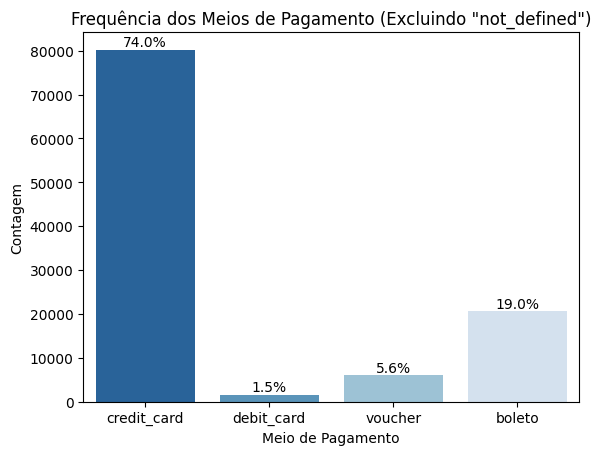

In [23]:
# Filtrando os dados e excluindo os valores "not_defined"
df_filtered = df[df['payment_type'] != 'not_defined']

# Calculando a porcentagem de cada meio de pagamento em relação ao total
#payment_percentages = df_filtered['payment_type'].value_counts(normalize=True) * 100

# Criando o gráfico de contagem
ax = sns.countplot(data=df_filtered, x='payment_type', palette='Blues_r')

# Adicionando os rótulos de contagem em cima de cada barra (porcentagem em relação ao total)
total = len(df_filtered)
for p in ax.patches:
    percentage = f"{p.get_height() / total * 100:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Definindo os rótulos dos eixos
plt.xlabel('Meio de Pagamento')
plt.ylabel('Contagem')

# Definindo o título do gráfico
plt.title('Frequência dos Meios de Pagamento (Excluindo "not_defined")')

# Exibindo o gráfico
plt.show()


**Review Score**: Which review score do we receive the most about our sales?

In [24]:
#Top score on reviews of Olist orders
review_counts = df.groupby('review_score').review_id.count().reset_index().sort_values(by='review_id', ascending = False).set_index('review_score')
review_counts

,review_id
review_score,
5,61554
4,20595
1,13546
3,9070
2,3745


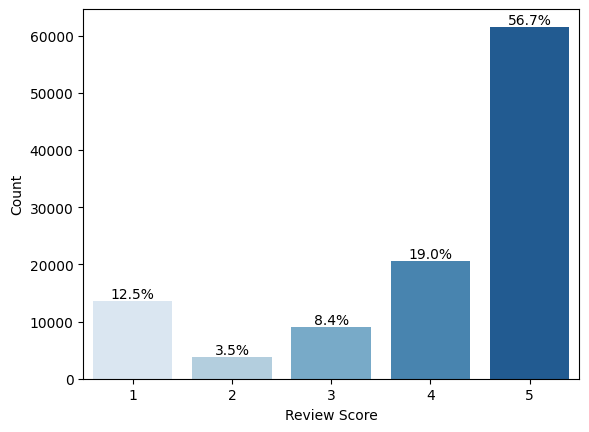

In [25]:
# Definindo uma paleta de cores em escala de azuis
colors = sns.color_palette('Blues', len(review_counts))

# Criando o gráfico de barras
ax = sns.barplot(x=review_counts.index, y='review_id', data=review_counts, palette=colors)

# Adicionando os rótulos de contagem em cima de cada barra

for p in ax.patches:
    percentage = f"{p.get_height() / total * 100:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Definindo os rótulos dos eixos
plt.xlabel('Review Score')
plt.ylabel('Count')

# Exibindo o gráfico
plt.show()


**Review Score vs Delivery time**: Is there a strong correlation between the review score and whether or not we delay a delivery?

In [26]:
# Calculate differences in days
df['estimated_delivery_time'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
df['real_delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [27]:
# Create new column
df['delivery_delay'] = (df['real_delivery_time'] - df['estimated_delivery_time'])

In [28]:
# Booleano: if real_delivery <= estimated delivery = 1 else 0
#So, '1' its good because it was delivered on time.

df.loc[df['real_delivery_time'] <= df['estimated_delivery_time'], 'delivery_status'] = 1
df.loc[df['real_delivery_time'] > df['estimated_delivery_time'], 'delivery_status'] = 0

In [29]:
df[['order_delivered_customer_date','order_approved_at', 'estimated_delivery_time', 'real_delivery_time', 'delivery_delay', 'review_score', 'delivery_status']]

,order_delivered_customer_date,order_approved_at,estimated_delivery_time,real_delivery_time,delivery_delay,review_score,delivery_status
0,2017-05-25 10:35:35,2017-05-16 15:22:12,19,8.0,-11.0,4,1.0
1,2018-01-29 12:41:19,2018-01-12 20:58:32,24,16.0,-8.0,5,1.0
2,2018-06-14 17:58:51,2018-05-20 16:19:10,24,26.0,2.0,5,0.0
3,2018-03-28 16:04:25,2018-03-13 17:29:19,27,14.0,-13.0,5,1.0
4,2018-08-09 20:55:48,2018-07-29 10:10:09,16,11.0,-5.0,5,1.0
...,...,...,...,...,...,...,...
119146,2018-04-13 20:06:37,2018-04-07 16:08:45,17,6.0,-11.0,4,1.0
119147,2018-04-11 18:54:45,2018-04-04 08:35:12,15,7.0,-8.0,5,1.0
119148,2018-05-09 19:03:15,2018-04-08 20:30:03,23,30.0,7.0,1,0.0
119149,2017-11-16 19:58:39,2017-11-03 21:31:20,31,12.0,-19.0,5,1.0


In [30]:
df_aux = sales_per_state = df.groupby('review_score').delivery_status.mean().reset_index().sort_values(by='review_score', ascending = False)
df_aux

,review_score,delivery_status
4,5,0.975056
3,4,0.956283
2,3,0.902787
1,2,0.814486
0,1,0.659240


In [31]:
fig = px.scatter (df_aux, x = 'review_score', y = 'delivery_status',
                 size = 'review_score', color = 'delivery_status',
                 hover_name = 'review_score', size_max = 50,
                 color_continuous_scale='Blues')
fig.show()

# Correlation between features

In [32]:
corr = df[['payment_value', 'review_score', 'price', 'freight_value', 'delivery_delay', 'delivery_status']]

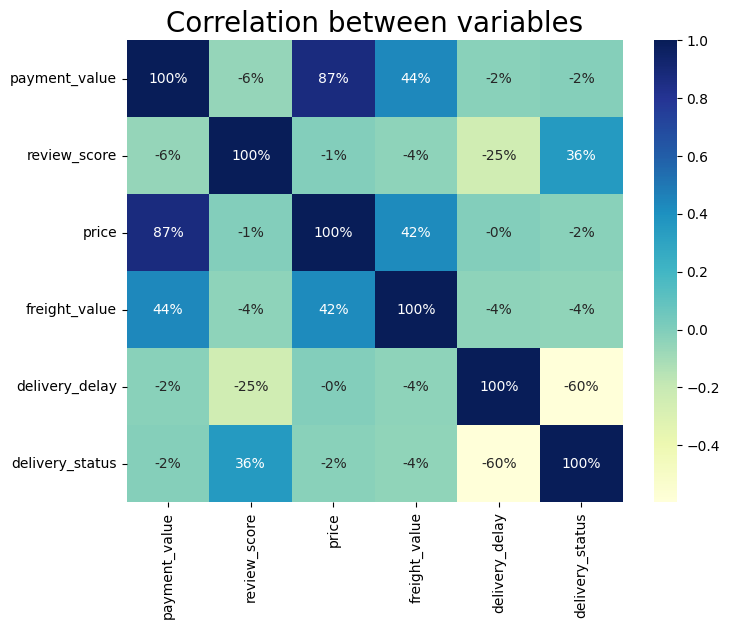

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(corr.corr(), annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Correlation between variables', fontsize = 20);

# 6. Feature Engineering

## 6.1 Target variable

**First, we will create the response variable for the classification model that will be discussed.**

Since the business area has informed us that **the target is review scores 4 and 5, we will label this range as '1' and the ranges below as '0'.** 

The goal of the project will be to determine whether a given customer **is likely to give a good or bad review.**

In [34]:
# Copy of df for modeling process
df_model = df.copy()

In [35]:
# Creation of the target variable

df_model['review_score'] = df_model['review_score'].apply(lambda x: 1 if x > 3 else 0)

## 6.2 Selecting features for the model

The dataset has variables that will not be used in the model, for example **purchase ID, product ID and delivery ID.**

Date variables too, as we have already extracted new features from them, such as **'real_delivery_time', 'estimated_delivery_time', 'delivery_delay', 'delivery_status'.**


In [36]:
# Selecion
df_model = df_model[['customer_state','order_status', 'payment_type', 'payment_installments', 'payment_value', 'review_score', 'price',
                     'freight_value', 'product_category_name', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 
                     'product_width_cm', 'real_delivery_time', 'estimated_delivery_time', 'delivery_delay', 'delivery_status']]

**Taking a look at missing values**

In [37]:
# Calculating the missing value count
missing_counts = df_model.isnull().sum()

# Calculating the percentage of missing values
missing_percentages = (missing_counts / len(df_model)) * 100

missing_data = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percentages})

missing_data['Missing Percentage'] = missing_data['Missing Percentage'].apply(lambda x: f'{x:.2f}%')

# Sorting the DataFrame by the value of the "Missing Count" column in descending order
missing_data = missing_data.sort_values(by='Missing Count', ascending=False)


print(missing_data)

                            Missing Count Missing Percentage
delivery_status                      3196              2.95%
delivery_delay                       3196              2.95%
real_delivery_time                   3196              2.95%
product_category_name                2397              2.21%
product_photos_qty                   2397              2.21%
product_description_lenght           2397              2.21%
product_weight_g                      851              0.78%
product_length_cm                     851              0.78%
product_height_cm                     851              0.78%
product_width_cm                      851              0.78%
price                                 833              0.77%
freight_value                         833              0.77%
payment_value                           1              0.00%
payment_installments                    1              0.00%
payment_type                            1              0.00%
review_score            

# 7. Machine Learning

In [38]:
from sklearn.model_selection import train_test_split

# Separating the features (independent variables) and the target (dependent variable)
x = df_model.drop('review_score', axis=1)  # Features
y = df_model['review_score']  # Target

# Train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print(f"Train Data: {x_train.shape}, {y_train.shape}")
print(f"Test Data: {x_test.shape}, {y_test.shape}")

Train Data: (75957, 18), (75957,)
Test Data: (32553, 18), (32553,)


## 7.1 Random Forest Pipeline

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

# Categorical features
categorical_features = ['customer_state', 'order_status', 'payment_type', 'product_category_name']

# Numerical features
numerical_features = ['payment_installments', 'payment_value', 'price', 'freight_value', 'product_description_lenght',
                      'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
                      'product_width_cm', 'real_delivery_time', 'estimated_delivery_time', 'delivery_delay',
                      'delivery_status']

# Pipeline for preprocessing categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder(handle_unknown='value', handle_missing='value'))])

# Pipeline for preprocessing of numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

# ColumnTransformer for applying pipelines to corresponding columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numerical_features)])


# Creating the Random Forest model
rf_model = RandomForestClassifier(random_state=10, 
                                  max_depth=10, n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features='sqrt')

# Apply preprocessing and apply Random Forest
pipe_rf = Pipeline(steps=[
                  ('preprocessor', preprocessor),
                  ('random_forest', rf_model)])



In [123]:
# Training model
pipe_rf.fit(x_train, y_train)

# Predict on training set
rf_train_predictions = pipe_rf.predict(x_train)

# Predict on test set
rf_test_predictions = pipe_rf.predict(x_test)

**Performance metrics**

**Accuracy**: measures the **proportion of correctly classified instances** out of the total number of instances in a classification problem. It provides an overall assessment of the model's correctness in predicting the classes of the samples.

In [124]:
from sklearn.metrics import accuracy_score

# Train Accuracy
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
print("Random Forest Train model accuracy:", rf_train_accuracy)

# Test Accuracy
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
print("Random Forest Test model accuracy:", rf_test_accuracy)


Random Forest Train model accuracy: 0.8198849348973761
Random Forest Test model accuracy: 0.8085276318618868


**Confusion Matrix**

[[ 2322  5754]
 [  484 23993]]


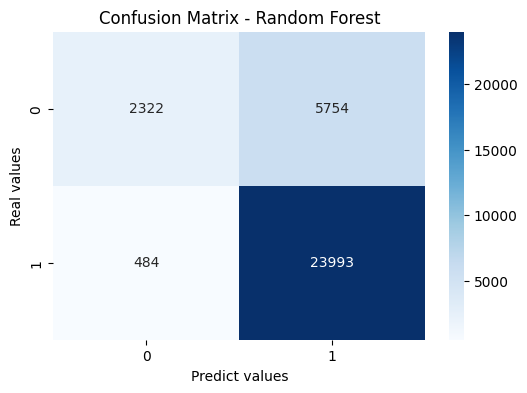

In [96]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculating the confusion matrix
rf_cm = confusion_matrix(y_test, rf_test_predictions)
print(rf_cm)


# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.show()

**Precision**: is the proportion of **true positive predictions out of the total instances predicted as positive**. It measures the accuracy of positive predictions and helps assess the model's ability to **avoid false positives**.

In [97]:
#Precision
from sklearn.metrics import precision_score

# Train Precision score of classifier
rf_train_precision = precision_score(y_train, rf_train_predictions)

print("Precision Train Score of the Random Forest classifier is:", rf_train_precision)

# Test Precision score of classifier
rf_test_precision = precision_score(y_test, rf_test_predictions)

print("Precision Test Score of the Random Forest classifier is:", rf_test_precision)

Precision Train Score of the Random Forest classifier is: 0.8162839848748437
Precision Test Score of the Random Forest classifier is: 0.8065687296197936


**Recall:** Recall, also known as sensitivity or true positive rate, is the proportion of **true positive predictions out of all actual positive instances**. It measures the model's ability to identify and capture all positive cases, **minimizing false negatives.**

In [98]:
#Sensitivy (Recall)
from sklearn.metrics import recall_score

# Calculating the Train recall score of classifier
rf_train_recall = recall_score(y_train, rf_train_predictions)
print("Train Recall Score of the Random Forest classifier is:", rf_train_recall)

# Calculating the Test recall score of classifier
rf_test_recall = recall_score(y_test, rf_test_predictions)
print("Test Recall Score of the Random Forest classifier is:", rf_test_recall)

Train Recall Score of the Random Forest classifier is: 0.9844465251768623
Test Recall Score of the Random Forest classifier is: 0.9802263349266659


**F1-score**: combines precision and recall into a single value, providing a **balanced measure** of a model's performance. It is the harmonic mean of precision and recall.

In [99]:
from sklearn.metrics import f1_score

# Train F1 score of classifier
rf_train_f1_score = f1_score(y_train, rf_train_predictions)
print(f"F1 Score of the Random Forest classifier is:", rf_train_f1_score)


# Test F1 score of classifier
rf_test_f1_score = f1_score(y_test, rf_test_predictions)
print(f"F1 Score of the Random Forest classifier is:", rf_test_f1_score)

F1 Score of the Random Forest classifier is: 0.8925132639025348
F1 Score of the Random Forest classifier is: 0.8849586898790205


**ROC Curv and Auc:** 

AUC for our classifier is: 0.7342411773367699


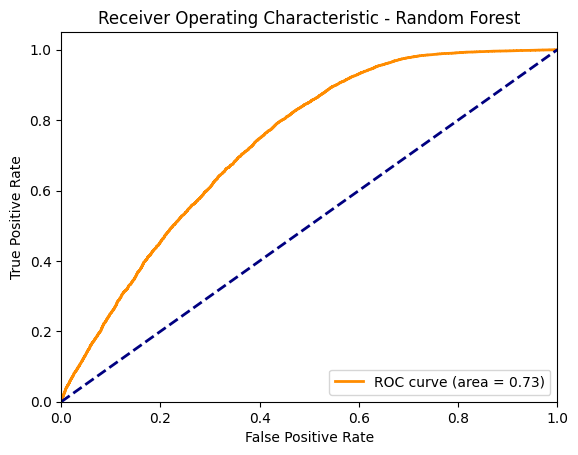

In [125]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Calculating and displaying the ROC curve for the Random Forest model
rf_probabilities = pipe_rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probabilities)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc_rf}")


plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

## 7.2 XGBoost

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier

# Categorical features
categorical_features = ['customer_state', 'order_status', 'payment_type', 'product_category_name']

# Numerical features
numerical_features = ['payment_installments', 'payment_value', 'price', 'freight_value', 'product_description_lenght',
                      'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
                      'product_width_cm', 'real_delivery_time', 'estimated_delivery_time', 'delivery_delay',
                      'delivery_status']

# Pipeline for preprocessing categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', TargetEncoder(handle_unknown='value', handle_missing='value'))])

# Pipeline for preprocessing of numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

# ColumnTransformer for applying pipelines to corresponding columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numerical_features)])

# Creating the XGBoost model
xgb_model = XGBClassifier(random_state=10)

# Apply preprocessing and apply XGBoost
pipe_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgboost', xgb_model)])

In [137]:
# Training model
pipe_xgb.fit(x_train, y_train)

# Predict train
xgb_train_predictions = pipe_xgb.predict(x_train)


# Predict test
xgb_test_predictions = pipe_xgb.predict(x_test)

**Performance Metrics - XGBoost**

**Accuracy**

In [138]:
# Train Accuracy
xgb_train_accuracy = accuracy_score(y_train, xgb_train_predictions)
print("XGBoost Train model accuracy:", xgb_train_accuracy)

# Train Accuracy
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)
print("XGBoost Test model accuracy:", xgb_test_accuracy)

XGBoost Train model accuracy: 0.8407783351106547
XGBoost Test model accuracy: 0.8109544435228704


**Confusion Matrix:**

[[ 2734  5342]
 [  812 23665]]


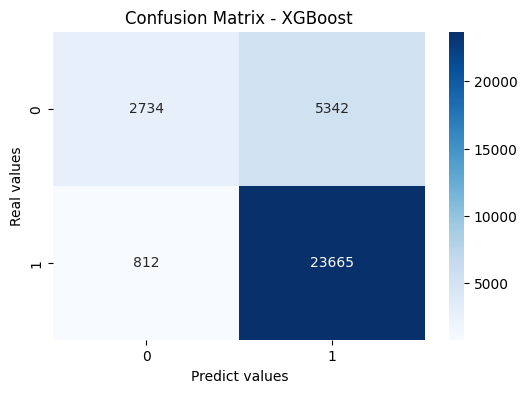

In [75]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculating the confusion matrix
rf_cm = confusion_matrix(y_test, xgb_test_predictions)
print(rf_cm)


# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predict values')
plt.ylabel('Real values')
plt.show()

**Precision:**

In [76]:
#Precision
from sklearn.metrics import precision_score

# Train precision score of Xgboost
xgb_train_precision = precision_score(y_train, xgb_train_predictions)
print("Train Precision Score of the XGB classifier is:", xgb_train_precision)


# Test precision score of Xgboost
xgb_test_precision = precision_score(y_test, xgb_test_predictions)
print("Test Precision Score of the XGB classifier is:", xgb_test_precision)

Train Precision Score of the XGB classifier is: 0.8370854657870603
Test Precision Score of the XGB classifier is: 0.8158375564518909


**Recall:**

In [77]:
#Sensitivy (Recall)
from sklearn.metrics import recall_score


# Train Recall score of classifier
xgb_train_recall = recall_score(y_train, xgb_train_predictions)
print("Train Recall Score of the XGB classifier is:", xgb_train_recall )


# Calculating the recall score of classifier
xgb_test_recall = recall_score(y_test, xgb_test_predictions)
print("Test Recall Score of the XGB classifier is:", xgb_test_recall)

Train Recall Score of the XGB classifier is: 0.9812734082397003
Test Recall Score of the XGB classifier is: 0.9668259999182907


**F1-Score:**

In [78]:
from sklearn.metrics import f1_score

# Calculating the Train F1 score of classifier
xgb_train_f1_score = f1_score(y_train, xgb_train_predictions)
print("Train F1 Score of the XGB classifier is:", xgb_train_f1_score)


# Calculating the Test F1 score of classifier
xgb_test_f1_score = f1_score(y_test, xgb_test_predictions)
print("Test F1 Score of the XGB classifier is:", xgb_test_f1_score)

Train F1 Score of the XGB classifier is: 0.9034626989575184
Test F1 Score of the XGB classifier is: 0.8849375514172463


**Curva ROC-AUC:**

AUC for our classifier is: 0.7451966056094588


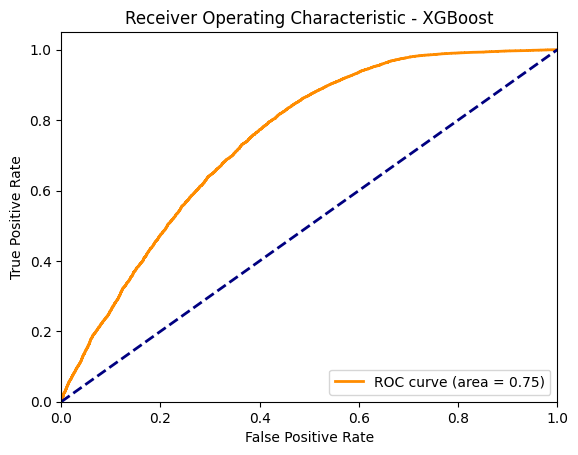

In [79]:
# Calculando e exibindo a curva ROC para o modelo XGBoost
xgb_probabilities = pipe_xgb.predict_proba(x_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_probabilities)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc_xgb}")


plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()


## 7.3 Comparing both classifiers

In [80]:
# Dataframe with the metrics
data_models = {
    'Modelo': ['Random Forest', 'XGBoost'],
    'Acurácia': [rf_test_accuracy, xgb_test_accuracy],
    'Precisão': [rf_test_precision, xgb_test_precision],
    'F1-score': [rf_test_f1_score, xgb_test_f1_score],
    'ROC AUC':  [roc_auc_rf, roc_auc_xgb]
}

df_metrics = pd.DataFrame(data_models)

# Print
print(df_metrics)


          Modelo  Acurácia  Precisão  F1-score   ROC AUC
0  Random Forest  0.819187  0.823581  0.889369  0.758405
1        XGBoost  0.810954  0.815838  0.884938  0.745197


**Pickle**

Both models, Random Forest and XGBoost, yielded similar results in terms of accuracy, precision, F1-score, and ROC AUC. 
However, when considering factors such as training time and scalability, XGBoost has a slight advantage. On average, XGBoost tends to have faster training times compared to Random Forest, thanks to its optimized boosting algorithm. 

Moreover, **XGBoost is designed to handle large datasets efficiently and can take advantage of distributed computing resources to speed up training**. While both models are scalable, XGBoost's design and implementation make it better suited for handling large volumes of data. 


XGBoost utilizes regularization techniques and gradual fitting to control overfitting, resulting in improved generalization on test data. Additionally, XGBoost's has the ability to **gradually adjust to the data and correct errors can lead to a smaller difference between training and test metrics, indicating more consistent performance and better generalization capability.**

Therefore, if **time and scalability are important considerations, XGBoost may be a preferable choice.** However, it's always advisable to conduct tests and adjustments with your specific data and resources to evaluate the efficiency and performance of each model.

In [81]:
import pickle

# Salvar o modelo em um arquivo usando pickle
filename = 'xgboost_model.pkl'
pickle.dump(pipe_xgb, open(filename, 'wb'))

In [82]:
import os

# Definir o caminho do arquivo
file_path = '/content/drive/MyDrive/Colab Notebooks/Olist_project/xgboost_model.pkl'

# Verificar se o diretório de destino existe, caso contrário, criar o diretório
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Salvar o modelo em um arquivo usando pickle
pickle.dump(xgb_model, open(file_path, 'wb'))